In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

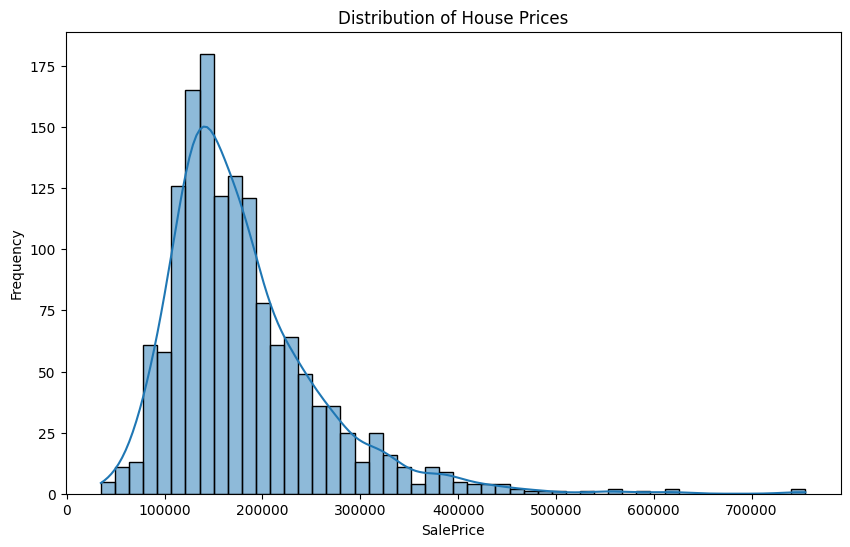

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

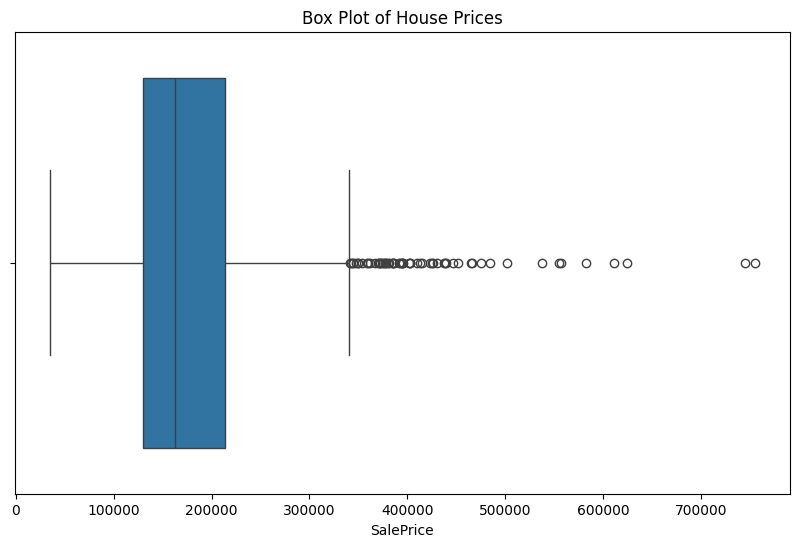

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'])
plt.title('Box Plot of House Prices')
plt.xlabel('SalePrice')
plt.show()

In [32]:
price_stats = {
    'Min': df['SalePrice'].min(),
    'Max': df['SalePrice'].max(),
    'Średnia': df['SalePrice'].mean(),
    'Mediana': df['SalePrice'].median(),
    'Q1': df['SalePrice'].quantile(0.25),
    'Q3': df['SalePrice'].quantile(0.75)
}

for stat, value in price_stats.items():
    print(f"{stat}: {value:.2f}")

Min: 34900.00
Max: 755000.00
Średnia: 180921.20
Mediana: 163000.00
Q1: 129975.00
Q3: 214000.00


In [25]:
area_columns = [col for col in df.columns if 'Area' in col or 'SF' in col]
print(area_columns)

['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea']


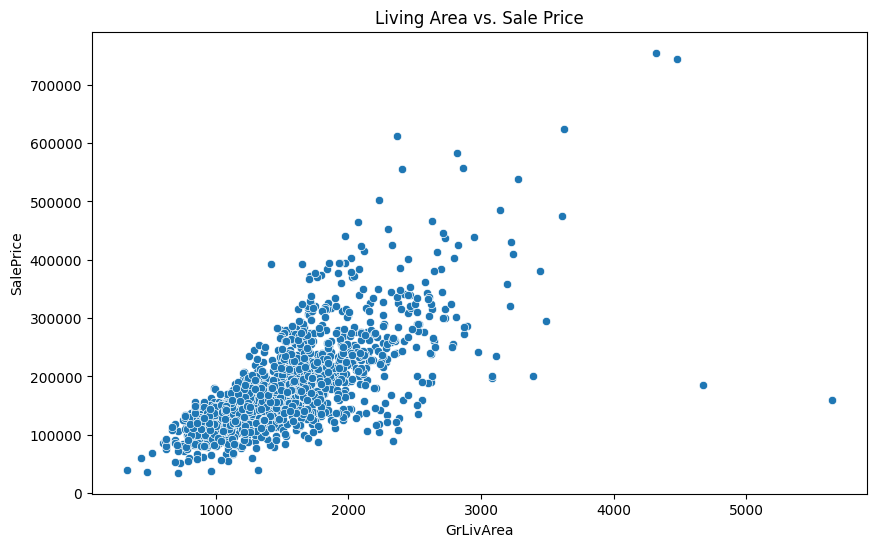

0.7086244776126523


In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title('Living Area vs. Sale Price')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

correlation = df['GrLivArea'].corr(df['SalePrice'])
print(correlation)

In [30]:
correlation2 = df['LotArea'].corr(df['SalePrice'])
print(correlation)
print(correlation2)


0.7086244776126523
0.2638433538714056


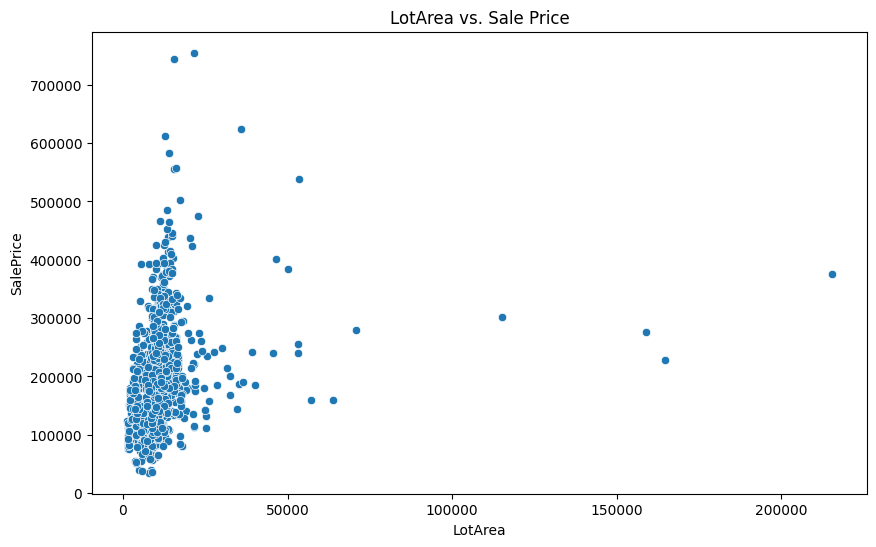

0.2638433538714056


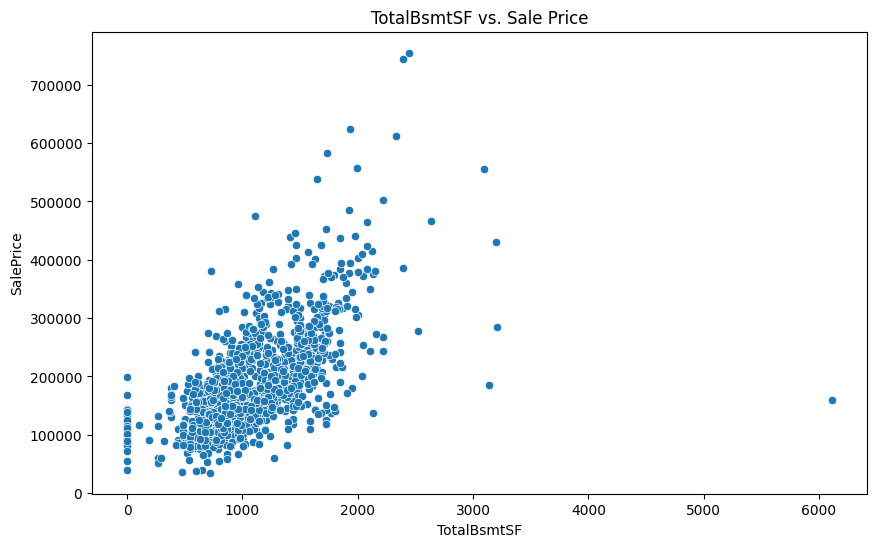

0.6135805515591956


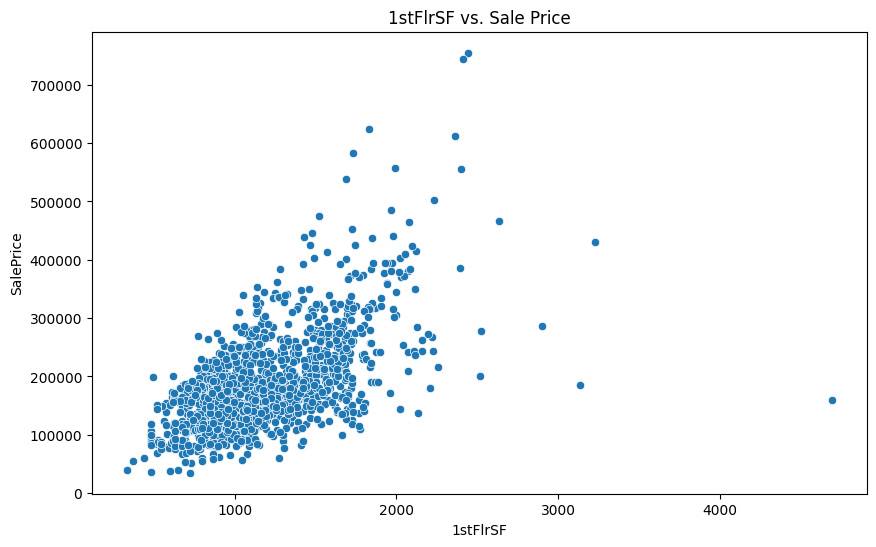

0.6058521846919147


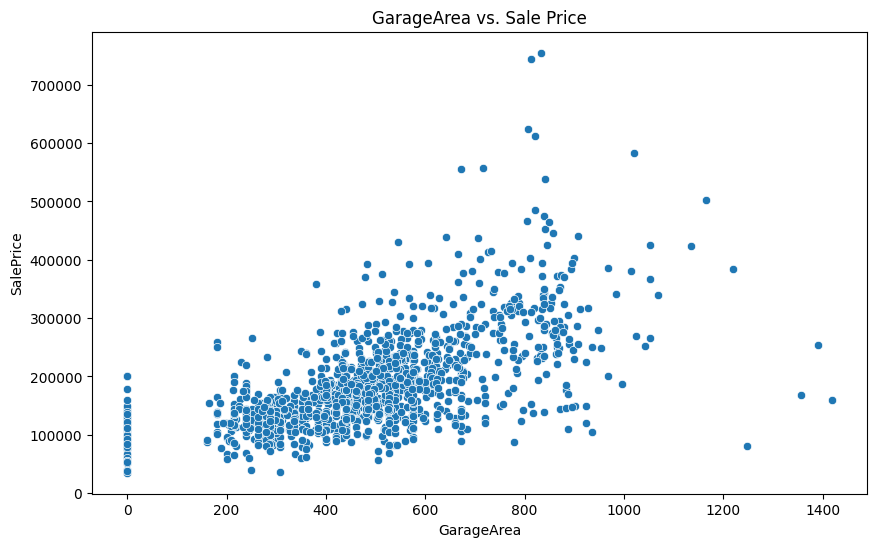

0.6234314389183618


In [34]:
selected_area_columns = ['LotArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

for col in selected_area_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f'{col} vs. Sale Price')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

    correlation = df[col].corr(df['SalePrice'])
    print(correlation)
